## GANs with MNIST, Single Digit, flatten vector

Simple example to confirm my knowledge...

Train: X=(6742, 28, 28), y=(6742,)
Test: X=(1135, 28, 28), y=(1135,)


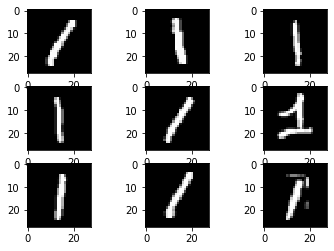

In [17]:
%matplotlib inline
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
# load dataset

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

train_filter = np.where((Y_train == 1))
test_filter = np.where((Y_test == 1))

X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]

X_train = (X_train / 255) - 0.5
X_test = (X_test/255) - 0.5

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

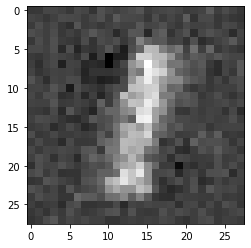

1999  acc_real:  1.0  acc_fake: 1.0


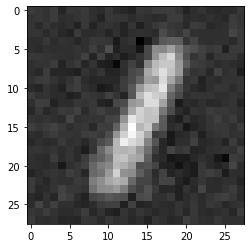

3999  acc_real:  1.0  acc_fake: 1.0


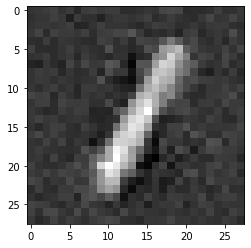

5999  acc_real:  1.0  acc_fake: 1.0


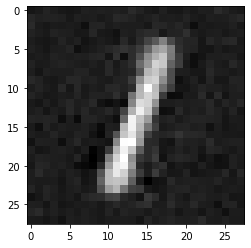

7999  acc_real:  0.984375  acc_fake: 0.984375


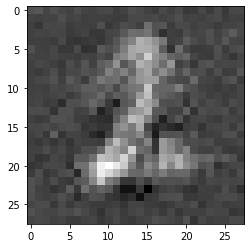

9999  acc_real:  1.0  acc_fake: 0.984375


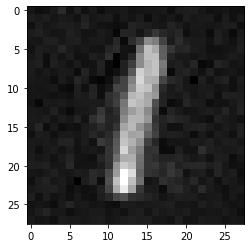

11999  acc_real:  1.0  acc_fake: 1.0


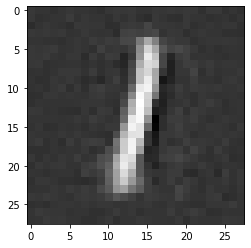

13999  acc_real:  1.0  acc_fake: 0.984375


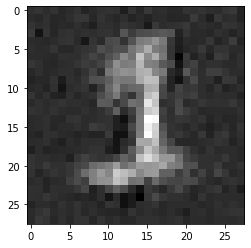

15999  acc_real:  0.96875  acc_fake: 1.0


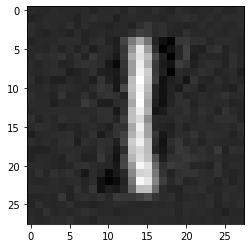

17999  acc_real:  0.859375  acc_fake: 1.0


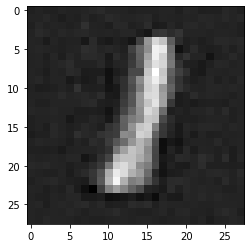

19999  acc_real:  1.0  acc_fake: 0.984375


In [44]:
%matplotlib inline

# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import random

# define the standalone discriminator model
def define_discriminator():
	model = Sequential()
	model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', input_shape=(784,)))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=784):
	model = Sequential()
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(100, activation = 'relu'))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# generate n real samples with class labels
def generate_real_samples(n):
	random_indices = random.sample(range(len(X_train)), n)
	X = []
	for i in range(n):
		X.append(trainX[random_indices[i]].flatten())
	X = np.array(X)
	# generate class labels
	y = ones((n, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=20000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		#print (i)
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		fakes = g_model.predict(x_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			pyplot.imshow(fakes[0].reshape(28,28), cmap=pyplot.get_cmap('gray'))
			pyplot.show()
			_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
			_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
			print (i, ' acc_real: ', acc_real, ' acc_fake:', acc_fake)

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

# Conclusion:

Even though generator is far from perfect (since discriminator maintains 98%+ accuracy on both real and fake), it definitely has come a long way from the blurry image. I believe that more time is needed and perhaps CNN network too!